In [63]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [173]:
xl = 2.0
yl = 1.0
N = 2000
t = 3
ini_condns = np.array([np.random.uniform(-xl,xl,N),np.random.uniform(-yl,yl,N)]).T
#ini_condns =  np.concatenate((ini_condns,np.array([[-xl,yl],[-xl,-yl],[xl,yl],[xl,-yl]])),axis=0)

In [174]:
ini_condns_arr = ini_condns.flatten()

In [175]:
def fun(t, y):
    res = np.zeros(len(y))
    for i in range(len(y)):
        if i % 2 == 0:
            res[i] = y[i+1]
        else:
            res[i] = - y[i-1]
    return res

def fun_d(t, y):
    res = np.zeros(len(y))
    for i in range(len(y)):
        if i % 2 == 0:
            res[i] = y[i+1]
        else:
            res[i] = - y[i-1] - y[i-1] ** 3
    return res

def PolyArea2D(pts):
    lines = np.hstack([pts,np.roll(pts,-1,axis=0)])
    area = 0.5*abs(sum(x1*y2-x2*y1 for x1,y1,x2,y2 in lines))
    return area


In [176]:
soln = solve_ivp(fun, [0,t], ini_condns_arr,t_eval= t/10*np.linspace(0,8,5))

7.92962169022225
7.92962169022225
7.930617263491071
7.929678946702721
7.934783646244597
7.929397978423519


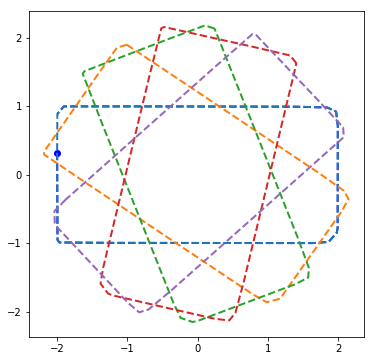

In [177]:
plt.figure(figsize=(6,6))
points = ini_condns
#plt.plot(ini_condns[:,0],ini_condns[:,1], '.')
hull = ConvexHull(ini_condns)
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'b--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'bo')
print(PolyArea2D(points[hull.vertices]))

for sol in soln.y.T:
    points_1 = np.reshape(sol, newshape=(len(ini_condns/2), 2))
    #plt.plot(points_1[:,0],points_1[:,1],'.')
    hull_1 = ConvexHull(points_1)
    xcoords = np.append(points_1[hull_1.vertices,0],points_1[hull_1.vertices[0],0])
    ycoords = np.append(points_1[hull_1.vertices,1],points_1[hull_1.vertices[0],1])
    plt.plot(xcoords, ycoords, '--', lw=2)
    #plt.plot(points_1[hull_1.vertices[0],0], points_1[hull_1.vertices[0],1], 'ro')
    print(PolyArea2D(points_1[hull_1.vertices]))


In [178]:
soln = solve_ivp(fun_d, [0,t], ini_condns_arr,t_eval= t/10*np.linspace(0,8,5))

7.92962169022225
11.705572202947106
7.92962169022225
9.89452922917393
9.824813648608629
14.014371028197111
13.666839781633179


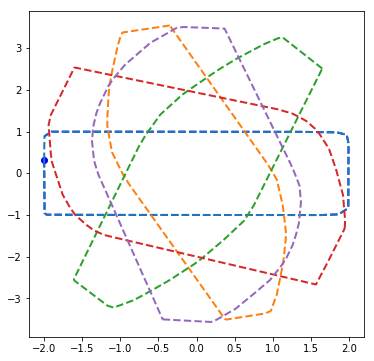

In [179]:
plt.figure(figsize=(6,6))
points = ini_condns
#plt.plot(ini_condns[:,0],ini_condns[:,1], '.')
hull = ConvexHull(ini_condns)
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'b--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'bo')
print(PolyArea2D(points[hull.vertices]))
print(hull.area)

for sol in soln.y.T:
    points_1 = np.reshape(sol, newshape=(len(ini_condns/2), 2))
    #plt.plot(points_1[:,0],points_1[:,1],'.')
    hull_1 = ConvexHull(points_1)
    xcoords = np.append(points_1[hull_1.vertices,0],points_1[hull_1.vertices[0],0])
    ycoords = np.append(points_1[hull_1.vertices,1],points_1[hull_1.vertices[0],1])
    plt.plot(xcoords, ycoords, '--', lw=2)
    #plt.plot(points_1[hull_1.vertices[0],0], points_1[hull_1.vertices[0],1], 'ro')
    print(PolyArea2D(points_1[hull_1.vertices]))
    print(PolyArea2D(points_1[hull_1.vertices]))


array([ 1.61258828,  0.18717044, -0.3552236 , ...,  1.        ,
        2.        , -1.        ])

array([[-0.65295226,  0.75739907, -1.99987647],
       [ 0.75739907,  0.65295226, -0.99993823],
       [-0.75739907, -0.65295226, -0.99993823],
       [ 0.65295226, -0.75739907, -1.99987647]])